# Kaggle

In this section, you can find the codes for downloading the dataset in Kaggle.

In [ ]:
# https://www.kaggle.com/general/74235
!pip -q install kaggle
from google.colab import files

files.upload()

{}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abdallahalidev/plantvillage-dataset # Copy API command

100% 2.04G/2.04G [00:23<00:00, 12.1MB/s]
100% 2.04G/2.04G [00:23<00:00, 94.7MB/s]


# Google Drive:
Instead of downloading from Kaggle, we will connect via Drive and use the ready dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://drive.google.com/file/d/1hW4otiVDOKjfl2K3UY2fFbMH2j7FyqVw/view?usp=sharing
# drive'a kısayol ekle deyip colab'tan çekebilirsiniz
!unzip -q drive/MyDrive/datasets/plantvillage-dataset.zip
#denemeop

# Import Packages

In [2]:
import os
import cv2
import glob
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from matplotlib import cm
from matplotlib import pyplot as plt
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms, models
import imageio
torch.cuda.empty_cache()

# Dataset analysis

In [ ]:
def showSample(path):
    img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

#deneme

In [ ]:


def showImages(path,list_size):
    fig, axes = plt.subplots(figsize=(20, 8), ncols=list_size)
    for i in range(list_size):
        ax = axes[i]
        ax.imshow(imageio.imread(path[i]))
        i=i+1
    plt.show()

In [ ]:
def printProperties(path):
    showSample(path)
    pic = imageio.imread(path)
    print('Type of the image : ' , type(pic)) 
    print('Shape of the image : {}'.format(pic.shape)) 
    print('Image Hight {}'.format(pic.shape[0])) 
    print('Image Width {}'.format(pic.shape[1])) 
    print('Dimension of Image {}'.format(pic.ndim))


In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

def clusterImage(path,num_of_clusters):
    img = imread(path) / 255
    image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
    kmeans = KMeans(n_clusters=num_of_clusters, random_state=0).fit(image_2D)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    # Reshape back the image from 2D to 3D image
    clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
    fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

    ax = axes[0]
    ax.imshow(img)
    ax.title.set_text("Original Image")

    ax = axes[1]
    ax.imshow(clustered_3D)
    ax.title.set_text("Clustered Image")
    plt.show()


In [ ]:

#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding
def threshold(path):
    img_color = cv2.imread(path,3)
    img = cv2.imread(path,0)
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

    titles = ['Original Image','Gray Scale Image','BINARY','BINARY_INV','TRUNC','TOZERO']
    images = [img_color, img, thresh1, thresh2, thresh3, thresh4]

    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()

In [ ]:
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

def segmentImage(path):
    original= cv2.imread(path,3)
    gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    display(original, thresh, 'Original Image', 'Segmented Image')

In [ ]:
files = glob.glob("plantvillage dataset/**/**/*.*")
len(files), list(np.random.choice(files, 10))

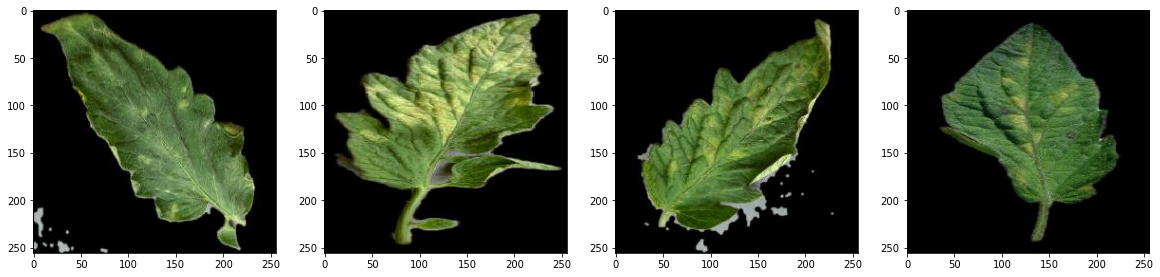

In [ ]:
imageList = [files[0],files[1],files[2],files[3]]
showImages(imageList,4)

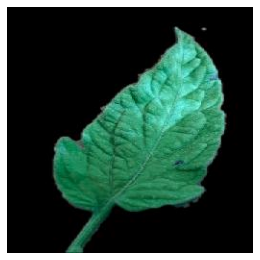

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (256, 256, 3)
Image Hight 256
Image Width 256
Dimension of Image 3


In [ ]:
printProperties(files[20])

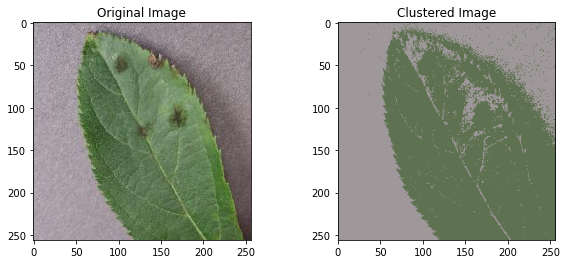

In [ ]:
clusterImage("/content/plantvillage dataset/color/Apple___Apple_scab/133c27cd-57f6-4790-b446-972327e13194___FREC_Scab 3362.JPG", 2)

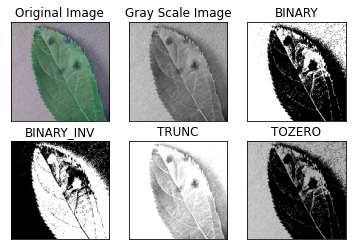

In [ ]:
threshold("/content/plantvillage dataset/color/Apple___Apple_scab/133c27cd-57f6-4790-b446-972327e13194___FREC_Scab 3362.JPG")

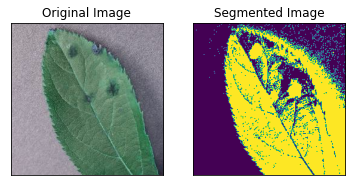

In [ ]:
segmentImage("/content/plantvillage dataset/color/Apple___Apple_scab/133c27cd-57f6-4790-b446-972327e13194___FREC_Scab 3362.JPG")

## Split Dataset

In [3]:
#SPLITTING DATASET INTO TRAIN/TEST/VALIDATION SUBSETS
#train, validation, test = 0.7, 0.15, 0.15
color = glob.glob("plantvillage dataset/color/**/*.*")
np.random.shuffle(color)

train_split,valid_split,test_split = int(len(color) * 0.7), int(len(color) * 0.15), int(len(color) * 0.15)
train_split

38013

In [4]:
train_path = color[:train_split]
val_path = color[train_split:train_split+valid_split]
test_path = color[train_split+valid_split:]

len(color), len(train_path), len(val_path), len(test_path)

(54305, 38013, 8145, 8147)

## Machine Learning

Classification will be made using SVM and KNN models.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

def svm_classifier(x_train,y_train,x_test):
    classifier = LinearSVC(random_state=0, max_iter=5, dual=False)
    classifier.fit(x_train, y_train)
    predicts = classifier.predict(x_test)
    return predicts


def knn_classifier(x_train,y_train,x_test,n_neig):
    
    knn = KNeighborsClassifier(n_neighbors=n_neig)
    knn.fit(x_train, y_train)
    predicts = knn.predict(x_test)
    return predicts


In [ ]:
import seaborn as sn
def accuracy_f1score(name,true_values,predicts):
    """This function takes name of the model, true values and predictions and it prints Accuracy and F1_Score of the predicted values"""
    accuracy = accuracy_score(true_values, predicts)
    f1 = f1_score(true_values, predicts, average=None)
    print(name,"Accuracy:", accuracy, "and F1_Score:", f1)


def drawCfMatrix(real_values, pred_values,matrixName):
    cm_array = confusion_matrix(real_values, pred_values)
    df_cm = pd.DataFrame(cm_array, range(2), range(2))
    sn.set(font_scale=1.0)
    ax = plt.axes()
    ax.xaxis.get_offset_text().set_visible(False)
    ax.yaxis.get_offset_text().set_visible(False)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, ax=ax)
    ax.set_title(matrixName)
    plt.savefig(matrixName)
    plt.show()
    plt.clf()



In [ ]:
def getLabels(data_path):
    labels = []
    for d in data_path:
        p1 = d.split("___", 1)[1]
        if p1.split("/", 1)[0] == "healthy":
            labels.append(0)
        else:
            labels.append(1)
    return labels

In [ ]:
from PIL import Image,ImageOps
from numpy import asarray

def convertToNumpyArray(img_path_list):
    numpyImageList = []
    for path in img_path_list:
        img = ImageOps.grayscale(Image.open(path).resize((64, 64)))
        numpydata = asarray(img)
        numpydata = numpydata.flatten() #machine learning algoritmalarını çalıştırmamız için 2d arrayi flatten etmemiz gerekiyor. ValueError: Found array with dim 3. Estimator expected <= 2.
        numpyImageList.append(numpydata)
    return numpyImageList


In [ ]:

#x=input images data, y=label
x_train = convertToNumpyArray(train_path)
y_train = getLabels(train_path)


In [ ]:

x_validation =  convertToNumpyArray(val_path) #convert image to numpy array
y_validation = getLabels(val_path)

x_test = convertToNumpyArray(test_path)
y_test = getLabels(test_path)

In [ ]:
x_train[0].shape

(4096,)

SVM Accuracy: 0.6166666666666667 and F1_Score: [0.41025641 0.71604938]


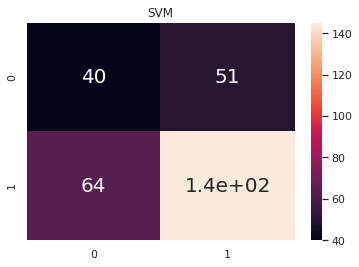

<Figure size 432x288 with 0 Axes>

In [ ]:
#deneme 100 tane foto atıp deneme yap
""""""

path1 = color[:2000]
#x=input images data, y=label
x1 = convertToNumpyArray(path1) 
y1 = getLabels(path1)

path2 = color[2000:2300]
x2 = convertToNumpyArray(path2)
y2 = getLabels(path2)

svm_predicts= svm_classifier(x1,y1,x2)
accuracy_f1score("SVM",y2,svm_predicts)
drawCfMatrix(y2, svm_predicts, "SVM")

In [ ]:
#SVM
""" COK UZUN SURUYOR/DAHA SONRA TEKRAR DENENECEK: 3 SAATTE SONUC VERMEDI
svm_predicts= svm_classifier(x_train,y_train,x_test)
accuracy_f1score("SVM",y_test,svm_predicts)
drawCfMatrix(y_test, svm_predicts, "SVM") """

KNN Accuracy: 0.8201792070700872 and F1_Score: [0.68501398 0.87417332]


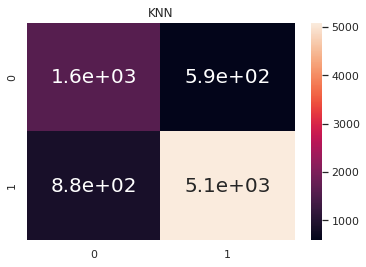

<Figure size 432x288 with 0 Axes>

In [ ]:
knn_predicts = knn_classifier(x_train,y_train,x_test,3)
accuracy_f1score("KNN",y_test,knn_predicts)
drawCfMatrix(y_test, knn_predicts, "KNN")

## **CNN**

In this section, classification will be made using Convolutional Neural Network.

##Loader

In [12]:
class PlantDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, transform):
        self.data_path = data_path
        self.transform = transform
        self.targets = []
        for d in self.data_path:
            p1 = d.split("___", 1)[1]
            if p1.split("/", 1)[0] == "healthy":
                self.targets.append(0)
            else:
                self.targets.append(1)
        
        print("data: {}, targets: {}".format(len(self.data_path), len(self.targets)))
        print("0_count: {}, 1_count: {}".format(self.targets.count(0), self.targets.count(1)))

        self.targets = torch.tensor(self.targets, dtype=torch.float32)

    def __len__(self):
        return len(self.data_path)

    def __getitem__(self, idx):
        img = Image.open(self.data_path[idx])
        img = np.array(img.convert("RGB"))
        # img = img.transpose((2, 0, 1))
        target = self.targets[idx]
        
        if self.transform:
            img = self.transform(img)
        
        return img, target

In [5]:
def getDatasets(imgSize,train_path,val_path,test_path):
    """ Augmentation için, yorum kısmını kaldırıp, train dataset'in transformunu aug_transform olarak ayarla
    aug_transform = transforms.Compose([transforms.Resize((imgSize,imgSize)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
    """

    transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

    train_dataset = PlantDataset(train_path, transform=transform)
    val_dataset = PlantDataset(val_path, transform=transform)
    test_dataset = PlantDataset(test_path, transform=transform)

    return train_dataset,val_dataset,test_dataset



## model

In [6]:
class Net(nn.Module):
    def __init__(self, out_size):
        super(Net, self).__init__()
        self.out_size = out_size

        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1)

        self.pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(32 * 126 * 126, out_size)
    
    def forward(self, x):
        # x -> [batch_size, channel, width, height]
        # x -> [128, 3, 256, 256]
        
        x = self.relu(self.conv1(x)) # x -> [128, 16, 254, 254]
        x = self.relu(self.conv2(x)) # x -> [128, 32, 252, 252]
        
        x = self.pool(x)             # x -> [128, 32, 126, 126]
        
        x = torch.flatten(x, 1)      # x -> [128, 32 * 126 * 126]
        
        x = self.fc1(x)
        
        return F.log_softmax(x, dim=1)

In [7]:

class Net2(nn.Module):
    def __init__(self,out_size):
      super().__init__() 
      self.conv1 = nn.Conv2d(3, 16, 3, 1) 
      self.conv2 = nn.Conv2d(16, 32, 3, 1)
      self.conv3 = nn.Conv2d(32, 64, 3, 1)

      self.fc1 = nn.Linear(30*30*64, 500)
      self.dropout1 = nn.Dropout(0.5) 
      self.fc2 = nn.Linear(500, out_size)

    def forward(self, x): #256x256x3
      x = F.relu(self.conv1(x)) #254x254x16
      x = F.max_pool2d(x, 2, 2)  #127x127x16
      x = F.relu(self.conv2(x)) #125x125x32
      x = F.max_pool2d(x, 3, 2) #62x62x32
      x = F.relu(self.conv3(x)) #60x60x64
      x = F.max_pool2d(x, 2, 2) #30x30x64
      
      x = x.view(-1, 30*30*64)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

## train

In [8]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device, dtype=torch.float), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target.type(torch.LongTensor).cuda())
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    print("-------------------------------------------")
    print("Train Accuracy:",  correct, '/', len(train_loader.dataset))
    print("Train Loss: ", running_loss / batch_idx)
    return running_loss / batch_idx, correct/len(train_loader.dataset)

In [9]:
def evaluate(model, device, a_loader):
    model.eval()
    e_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in a_loader:
            data, target = data.to(device, dtype=torch.float), target.to(device)
            output = model(data) 
            e_loss += F.nll_loss(output, target.type(torch.LongTensor).cuda(), reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    e_loss /= len(a_loader.dataset)

    print('\n Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        e_loss, correct, len(a_loader.dataset),
        100. * correct / len(a_loader.dataset)))
    
    return e_loss, correct / len(a_loader.dataset)



In [13]:
#get datasets 
train_dataset,val_dataset,test_dataset= getDatasets(256,train_path,val_path,test_path)
print(len(train_dataset), len(val_dataset), len(test_dataset))

data: 38013, targets: 38013
0_count: 10553, 1_count: 27460
data: 8145, targets: 8145
0_count: 2253, 1_count: 5892
data: 8147, targets: 8147
0_count: 2278, 1_count: 5869
38013 8145 8147


In [18]:
#get loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


In [19]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [20]:
#Tune the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net(2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
train_accuracy_values = []
train_loss_values = []
val_loss_values = []
val_accuracy_values = []

torch.cuda.empty_cache()

#evaluate(model, device, test_loader)
for epoch in range(5):
    train_loss,train_accuracy = train(model, device, train_loader, optimizer, epoch)
    train_loss_values.append(train_loss)
    train_accuracy_values.append(train_accuracy)

    val_loss, val_acc = evaluate(model, device, test_loader)
    val_accuracy_values.append(val_acc)
    val_loss_values.append(val_loss)

#torch.save(model.state_dict(), "plant_model.pth")

In [ ]:
plt.plot(train_loss_values, label='Training loss')
plt.plot(val_loss_values, label='Validation loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()